<a href="https://www.kaggle.com/code/pmassouf/plotly-dataviz?scriptVersionId=102483943" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.graph_objects as go



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecom-customer-churn-by-maven-analytics/telecom_customer_churn.csv
/kaggle/input/telecom-customer-churn-by-maven-analytics/telecom_zipcode_population.csv
/kaggle/input/telecom-customer-churn-by-maven-analytics/telecom_data_dictionary.csv


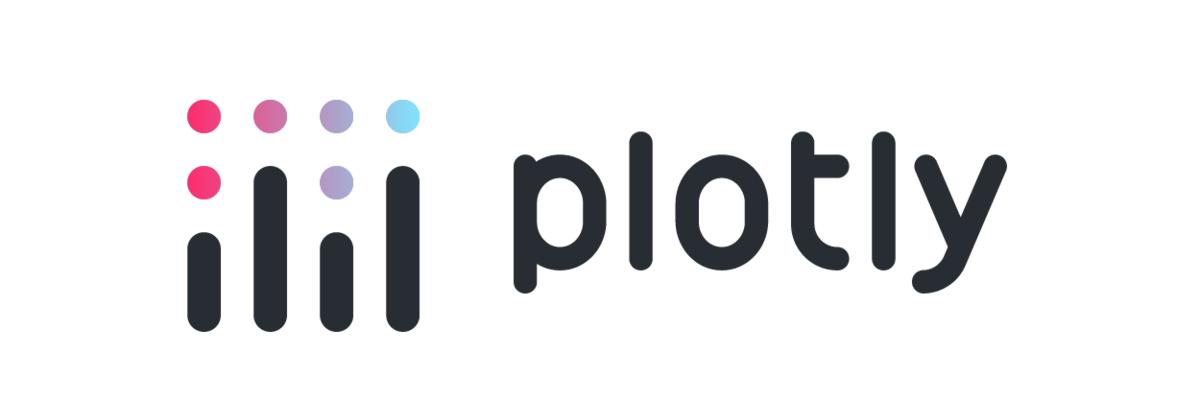

**In this notebook we'll explore some of the features of plotly, a graphing library.**

# Location

In [2]:
import plotly.graph_objects as go


df = pd.read_csv('/kaggle/input/telecom-customer-churn-by-maven-analytics/telecom_customer_churn.csv')

fig = go.Figure(data=go.Scattergeo(
        lon = df['Longitude'],
        lat = df['Latitude'],
        text = df['Customer ID'],
        mode = 'markers',
        ))

fig.update_layout(
        title = 'Clients locations',
        geo_scope='usa',
    )
fig.update_geos(fitbounds="locations") 

# Revenues and Charges

In [3]:

fig = go.Figure(data=[go.Scatter3d(x=df['Age'], y=df['Monthly Charge'], z=df['Total Revenue'],
                                   mode='markers', marker=dict(
        size=5,               # set color to an array/list of desired values
        opacity=0.8))])

fig.update_layout(scene = dict(
                    xaxis_title='Age',
                    yaxis_title='Monthly Charge',
                    zaxis_title='Total Revenue'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))

fig.show()

We can see that there are different groups of customers. One that pays almost nothing regardless of the revenue, one that pays around 20 dollars a month with revenues up to 6k, and then a large group with what looks like a linear trend between monthly charge and revenue.  

# Churn Reason

In [4]:

fig = go.Figure(data=[go.Histogram(x= df['Churn Reason'])])
fig.show()

There seems to be a lot of competition in the area. A lot of customers also complain about a lack of support person.

# Cities

In [5]:

fig = go.Figure(data=[go.Histogram(x= df[df['Customer Status'] == 'Churned']['City'])])
fig.show()


We can see in which cities the customers churn the most.